# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

>**Answer to note: I am using Python 3.6.8**

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**HINT:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# Just for the sake of simplifying EDA and putting everything into one place for later reference,
# I'll use the pandas-profiling package here, but also fill out the variables requested 
# below
import pandas_profiling as pdp

pdp.ProfileReport(data)

Number of variables,14
Number of observations,45222
Total Missing (%),0.0%
Total size in memory,4.8 MiB
Average record size in memory,112.0 B
Numeric,5
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [3]:
data.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.079683,0.059351,0.101992
education-num,0.037623,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000


In [5]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k / n_records * 100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


### Featureset Exploration

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

In [6]:
# I can't get visuals.py to output a figure, so I've copied the code from there into the notebook to run it directly

###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['capital-gain','capital-loss']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()


def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()
    

def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  


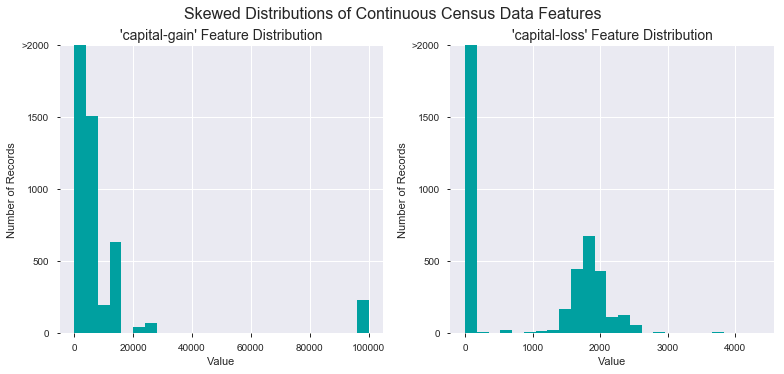

In [7]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

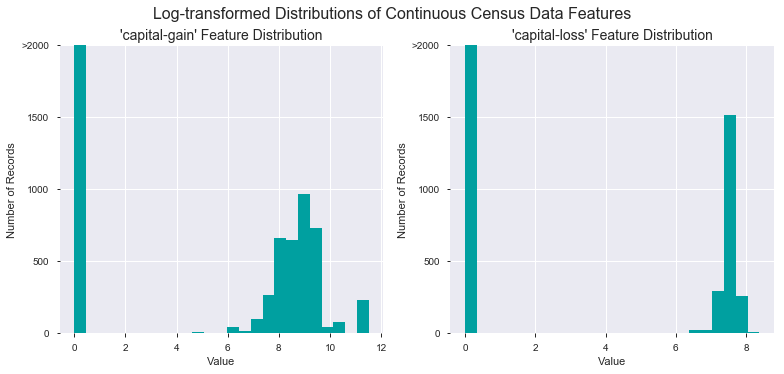

In [8]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [9]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/Users/emigre459/anaconda3/envs/charityML/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [10]:
# Define columns that are categorical in nature
cat_cols = ['workclass', 'education_level', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'native-country']

for col in cat_cols:
    print(f"Column = {col}")
    print(features_log_minmax_transform[col].unique())
    print("\n\n")

Column = workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']



Column = education_level
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']



Column = marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']



Column = occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']



Column = relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']



Column = race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']



Column = sex
[' Male' ' Female']



In [11]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()

# Note that I set drop_first = True to avoid the Dummy Variable Trap wherein we provide too much information
# to the model by including a one-hot-encoded column for every possible level of a categorical variable
# (typically you want to include N-1 levels, since any record with a 0 for all other levels must have a 1 
# for the left out level.). Note that we checked in the earlier cell to make sure no record included multiple levels
# (which would reduce the value of this approach)
features_final =  pd.get_dummies(features_log_minmax_transform, prefix_sep = '__', 
                                 drop_first = True, columns = cat_cols)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K': 0, '>50K': 1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

95 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass__ Local-gov', 'workclass__ Private', 'workclass__ Self-emp-inc', 'workclass__ Self-emp-not-inc', 'workclass__ State-gov', 'workclass__ Without-pay', 'education_level__ 11th', 'education_level__ 12th', 'education_level__ 1st-4th', 'education_level__ 5th-6th', 'education_level__ 7th-8th', 'education_level__ 9th', 'education_level__ Assoc-acdm', 'education_level__ Assoc-voc', 'education_level__ Bachelors', 'education_level__ Doctorate', 'education_level__ HS-grad', 'education_level__ Masters', 'education_level__ Preschool', 'education_level__ Prof-school', 'education_level__ Some-college', 'marital-status__ Married-AF-spouse', 'marital-status__ Married-civ-spouse', 'marital-status__ Married-spouse-absent', 'marital-status__ Never-married', 'marital-status__ Separated', 'marital-status__ Widowed', 'occupation__ Armed-Forces', 'occupation__ Craft-repair', 'occupati

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [12]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
# Shuffling is default = True
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \\$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \\$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \\$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \\$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall}$$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \\$50,000, and those who make more), it's clear most individuals do not make more than \\$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \\$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That being said, using that prediction would be pointless: If we predicted all people made less than \\$50,000, *CharityML* would identify no one as donors. 

#### Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives (words classified as spam, and which are actually spam) to all positives (all words classified as spam, irrespective of whether that was the correct classification). In other words, it is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives (words classified as spam, and which are actually spam) to all the words that were actually spam. In other words, it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is the weighted average (harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score (we use the harmonic mean for this as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later. 

**Please note** that the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

**HINT:** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives (TN) or False Negatives (FN) as we are not making any negative ('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision (True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score (True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [13]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
tp = np.sum(income)
tn = 0
fn = 0
fp = len(income) - tp

accuracy = (tp + tn) / (tp + fp + tn + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5**2) * (precision * recall) / (0.5**2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**HINT:**

Structure your answer in the same format as above, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer:** 

1. **Model: Logistic Regression**

    1. Describe one real-world application in industry where the model can be applied. 
        * Used in medical scales to assess the severity of a patient's situation and likely outcome as a result of that situation, including the Trauma and Injury Severity Score (TRISS).
    2. What are the strengths of the model; when does it perform well?
        * Simple to interpret the results, like most linear models
        * Easy to tune due to small number of hyperparameters
        * Robust to noise
        * Provides probabilities for classification outputs, allowing you to rank your results
        * Can apply L1 or L2 regularization to combat overfitting
        * Computationally efficient
    3. What are the weaknesses of the model; when does it perform poorly?
        * Does not handle large numbers of categorical features well
        * Does not do well with high-dimensionality data
    4. What makes this model a good candidate for the problem, given what you know about the data?
        * This is a very simplistic and relatively explainable model. In order to ensure we aren't over-complicating our modeling effort, including a simple model with high interpretability like this is important as a baseline, KISS (Keep It Simple Stupid) model. To achieve this particular outcome, we could have also used a Decision Tree, but the potential for that to overfit is too great and instead it makes sense to simply use an ensemble method. While it's not ideal that we have a number of categorical features in our data, we also have low dimensionality, and the pros significantly outweight the cons for this model, so it's definitely worth a shot!
    5. **References:**
        1. https://www.hackingnote.com/en/machine-learning/algorithms-pros-and-cons
        2. https://en.wikipedia.org/wiki/Logistic_regression
        3. Boyd, Carl, Mary Tolson, and Wayne Copes. “Evaluating Trauma Care.” *The Journal of Trauma: Injury, Infection, and Critical Care* 27, no. 4 (April 1, 1987): 370–78.        4. 



2. **Model: Gradient Boosting**

    1. Describe one real-world application in industry where the model can be applied. 
        * [The search engines Yahoo and Yandex use gradient boosting to perform ranking tasks](https://en.wikipedia.org/wiki/Gradient_boosting#Usage), presumably by leveraging the probability predictions of this technique to produce an order to the labels being sought.
    2. What are the strengths of the model; when does it perform well?
        * Gradient Boosting works well with high bias models (e.g. shallow decision trees or linear models). This approach provides a lot of options ultimately, making it very flexible, and the weak learners concept in general has been shown to perform fairly well in a variety of settings. Given that we have >45K observations, the data quantity should be sufficient to make this a useful approach.
    3. What are the weaknesses of the model; when does it perform poorly?
        * This modeling approach can perform poorly if there are too few observations to work from. Bootstrap sampling, for example, may end up with too many very similar/not independent samples for a small dataset, rendering the assumptions under which this modeling approach works well moot. 
        * Boosting methods, including gradient boosting, are not parallelizable and thus can be computationally expensive for large datasets or complex trends.
    4. What makes this model a good candidate for the problem, given what you know about the data?
        * In contrast to a single model, an ensemble method such as gradient boosting allows us to mitigate high bias through boosting to leverage the specific strengths of individual weak learners. This makes them ideal for trying to squeeze the most accuracy out of a prediction as possible, albeit at the cost of more complexity.
    5. **References:**
        1. https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
        2. https://en.wikipedia.org/wiki/Gradient_boosting#Usage



3. **Model: Support Vector Machines (SVM)**

    1. Describe one real-world application in industry where the model can be applied. 
        * Facial recognition. As SVMs are very good when there are reasonably clear boundaries between labels, they can be very good at identifying the boundary between a face and the rest of an image. It can also be used for anomaly detection (when paired with a segmentation model) in industrial applications like monitoring turbomachinery in a petroleum production facility.
    2. What are the strengths of the model; when does it perform well?
        * The delineation between classes in feature space is very clear
        * When you have a high-dimensional feature space. SVMs can even perform well when the number of dimensions exceed the number of observations!
        * When you need the versatility of options provided by the different kernels
    3. What are the weaknesses of the model; when does it perform poorly?
        * Works poorly on very large data sets, as $t_{training}\propto n^3$
        * Works poorly if there is enough noise in the data to cause classes to overlap significantly in feature space
    4. What makes this model a good candidate for the problem, given what you know about the data?
        * SVMs, via the kernel trick in particular, are extremely versatile. They allow for a significant revamping of the model through simple hyperparameter tuning and work extremely well with smaller-to-medium-sized datasets, such as this one. 
    5. **References:**
        1. https://en.wikipedia.org/wiki/Support-vector_machine
        2. https://data-flair.training/blogs/applications-of-svm/
        3. Martí, Luis, Nayat Sanchez-Pi, José Manuel Molina López, and Ana Cristina Bicharra Garcia. "On the Combination of Support Vector Machines and Segmentation Algorithms for Anomaly Detection: A Petroleum Industry Comparative Study.” *Journal of Applied Logic*, SI:SOCO14, 24 (November 1, 2017): 71–84. https://doi.org/10.1016/j.jal.2016.11.015.

   

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [19]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

/Users/emigre459/anaconda3/envs/charityML/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/emigre459/anaconda3/envs/charityML/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/emigre459/anaconda3/envs/charityML/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


/Users/emigre459/anaconda3/envs/charityML/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/emigre459/anaconda3/envs/charityML/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/emigre459/anaconda3/envs/charityML/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 361 samples.
SVC trained on 3617 samples.


/Users/emigre459/anaconda3/envs/charityML/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


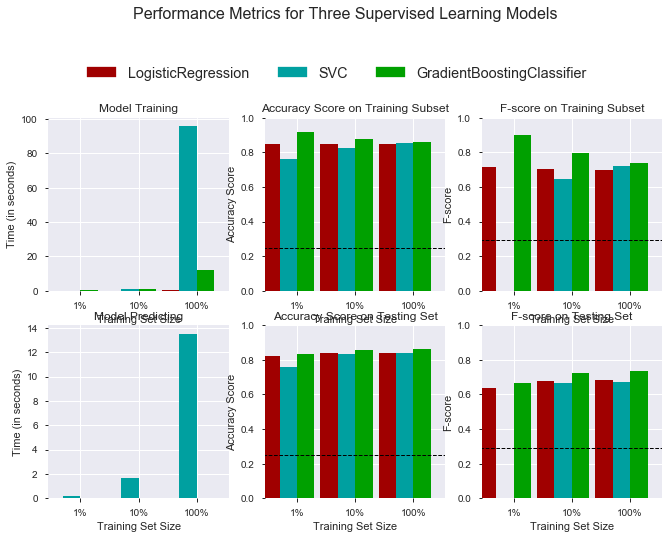

In [58]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC

# TODO: Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = SVC(random_state=42)
clf_C = GBC(random_state=42) # max_features = None = all features, but reducing
                                # this value can decrease variance and increase bias

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1 * len(y_train))
samples_1 = int(0.01 * len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

In [59]:
new_ix = ['1% Train Size', '10% Train Size', '100% Train Size']

results_GBC = pd.DataFrame.from_dict(results['GradientBoostingClassifier'], orient='index')
results_GBC.index = pd.Index(new_ix)

results_logReg = pd.DataFrame.from_dict(results['LogisticRegression'], orient='index')
results_logReg.index = pd.Index(new_ix)

results_SVM = pd.DataFrame.from_dict(results['SVC'], orient='index')
results_SVM.index = pd.Index(new_ix)

In [60]:
results_logReg

,train_time,pred_time,acc_train,acc_test,f_train,f_test
1% Train Size,0.010677,0.011393,0.850000,0.823107,0.717213,0.640310
10% Train Size,0.029402,0.007386,0.846667,0.838585,0.703125,0.677781
100% Train Size,0.489650,0.007955,0.846667,0.841902,0.698529,0.683165


In [61]:
results_SVM

,train_time,pred_time,acc_train,acc_test,f_train,f_test
1% Train Size,0.058109,0.210456,0.760000,0.756219,0.000000,0.000000
10% Train Size,0.866322,1.642811,0.826667,0.831620,0.648148,0.668346
100% Train Size,96.000654,13.533516,0.853333,0.837258,0.719697,0.674599


In [62]:
results_GBC

,train_time,pred_time,acc_train,acc_test,f_train,f_test
1% Train Size,0.146703,0.031180,0.920000,0.833941,0.900735,0.667073
10% Train Size,0.938826,0.046105,0.876667,0.855832,0.793651,0.721712
100% Train Size,12.171434,0.036119,0.860000,0.862797,0.738636,0.737687


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom right from the cell above (the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

In [65]:
metric = 'f_test'
perf_GBC = results_GBC.loc['100% Train Size', metric]
perf_logReg = results_logReg.loc['100% Train Size', metric]
perf_SVM = results_SVM.loc['100% Train Size', metric]


pct_diff_GL = (perf_GBC - perf_logReg) / perf_logReg
pct_diff_GS = (perf_GBC - perf_SVM) / perf_SVM

print(f"For {metric}: \n\nLogistic Regression = {perf_logReg}\nSVM = {perf_SVM}\
      \nGBC = {perf_GBC}")


print(f"\nGBC is {pct_diff_GL * 100}% different from Logistic Regression")
print(f"GBC is {pct_diff_GS * 100}% different from SVM")

For f_test: 

Logistic Regression = 0.6831652282416554
SVM = 0.6745988429210785      
GBC = 0.7376870153980561

GBC is 7.980761447231449% different from Logistic Regression
GBC is 9.35195385212932% different from SVM


**Answer:**

I evaluated a logistic regression, a support vector machine (rbf kernel), and a gradient boosted classifier. 

One thing I'll note: I ran this exercise on the two types of loss allowed for the Gradient Boosted Classifier (as I was unfamiliar with the impact they could have). Using deviance loss for the gradient boosted classifier (which is shown here) makes it very similar to a logistic regression in terms of its loss function. Using this loss type, it was interesting to see how it compared to the pure logistic regression model. The boosted classifier actually outperformed the regular logistic regression slightly in terms of accuracy and F-score! The same was true when I then tried `loss='exponential'`, with a bit of a reduction in the training F-score at 100% of samples. 

**A lack of high-score convergence between training and testing F-scores as a function of training set size for the exponential loss version, in addition to the other performance metrics shown below, has convinced me to go forward with the deviance loss version of the GradientBoostingClassifier (GBC).** 

* **Metrics - F score on the testing when 100% of the training data is used**
    * The test set F-score using the GBC at 100% training data is close (at least for the single-run AKA non-cross-validation approach we're using here) when compared to the other two model types, but still the winner on this front is clear. GBC achieves an F-score of 0.738, making it approximately 7.98% better than the logistic regression and 9.35% better than the SVM for this same metric. 

* **Prediction/training time**
    * **Training time (100% training samples):** the training and prediction times were where the GBC model was a bit of a flop compared to logistic regression. Logistic regression beat both models by orders of magnitude in this metric, with a training time of 0.50 seconds compared to 12.2 seconds for GBC and a whopping 96 seconds for SVM. This corresponds to a 2,386% difference between GBC and logistic regression and a -87% difference between GBC and SVM.
        * It's pretty clear to me now that when people say "SVMs shouldn't be used with too big of datasets", *too big* means *tens of thousands*, like this dataset. Clearly using the full training set was too much for the SVM classifier. Oh well, now I'm calibrated!
    * **Prediction time (100% training samples):** this was a less crazy time differential across GBC and logistic regression than was the case with the training time, but it was still a significant difference. The logistic regression was able to perform its predictions in 0.008 seconds, compared to 0.036 seconds for GBC and 13.5 seconds for SVM. This corresponded to a 354% difference between the GBC and logistic regression models and a -99.7% difference between the GBC and SVM models. 

* **The algorithm's suitability for the data.**
    * Ultimately, it's clear that SVM is a poor performer in terms of both performance and training/testing time. It seems likely that the tens of thousands of observations in this dataset were just too much for the SVM algorithm. 
    * Logistic regression's inferiority to GBC is less obvious here, but given that the training and prediction times for GBC on this dataset are not outrageous, and GBC clearly outperforms logistic regression on the other metrics, it seems that GBC is our best bet here. 
    * Were we to try and put this resultant model into production with large amounts of streaming data and regular re-training, we would probably need to consider tuning the logistic regression and seeing how good we can make it to avoid the more computationally expensive GBC. But especially given that there are a number of hyperparameters available for tuning with the GBC in comparison to the relatively simplistic logistic regression, we have a better chance of getting significant returns on our hyperparameter tuning work for GBC over logistic regression. 

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer:** 

The Gradient Boosting Classifier trains a bunch of so-called "weak learners" and then optimizes them to produce a single "strong learner" that we also call an ensemble model. More specifically, this model uses another model type called decision trees, which are known to be poor learners that don't generalize well to problems, as its weak learner. It (and boosting methods in general) trains this weak learner on the data initially, then looks at the data points that this weak learner predicted incorrectly. It then saves that first weak learner model and trains a new weak learner on the same data, but weights the data points that were incorrectly predicted by the first weak learner (AKA sub-model) such that this new sub-model will focus more on correctly those incorrect data points. This process continues until either all data points are correctly predicted by the group of previously trained weak learners, or the algorithm gets to a user-defined setpoint (e.g. the number of allowed weak learners is reached).

There are a number of flavors of this type of ensemble model approach, but the gradient boosted one we've used here only really differs from other boosting methods in terms of how the error in the predictions are calculated. It uses a technique called gradient descent that essentially is a very efficient way of finding the most accurate model possible.

**Resources used for this explanation:**
1. https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
2. https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [69]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import RandomizedSearchCV
# Note that I am using RandomizedSearchCV instead of GridSearchCV due to its expected
# faster convergence on ideal hyperparameters

# TODO: Initialize the classifier
# TODO: consider adding n_iter_no_change = 50
clf = GBC(random_state=42) # max_features = None = all features, but reducing
                            # this value can decrease variance and increase bias

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate': [0.01, 0.1, 1.0],
             'n_estimators': [50, 100, 250, 500],
             'min_samples_split': [2, 3, 5],
             'min_samples_leaf': [1, 2, 5],
             'max_depth': [2, 3, 5]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = RandomizedSearchCV(clf, parameters, n_iter = 10, cv = 3,
                              scoring = scorer, random_state=42)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8628
F-score on testing data: 0.7377

Optimized Model
------
Final accuracy score on the testing data: 0.8642
Final F-score on the testing data: 0.7425


In [70]:
best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |  0.8628           |   0.8642        |
| F-score        |  0.7377           |   0.7425        |


**Answer:**

Using `RandomizedSearchCV`, I was able to find a combination of hyperparameters that was slightly improved over the default hyperparameter values. I saw an increase in the accuracy score of 0.0014 (0.16%) and an increase in the F-score of 0.0048 (0.65%) relative to the unoptimized model. These are, of course, very modest improvements. However, this may simply indicate that this model is already performing quite well on this dataset and not much is to be gained through hyperparameter tuning. 

When compared to our naive predictor earlier (which had an accuracy score of 0.2478 and an F-score of 0.2917), we see an improvement of 0.616 (248.7%) and 0.451 (154.5%) for the accuracy and F-score, resp. Obviously, we see massively better performance with this gradient boosting classifier compared to the naive assumption that every person in the dataset makes more than \\$50K.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:** 

I believe the following features are most likely to be in the top five (in this order):

1. `education_level`: There are [all sorts](https://www.bls.gov/emp/chart-unemployment-earnings-education.htm) of [reports](https://www.nytimes.com/2014/09/11/business/economy/a-simple-equation-more-education-more-income.html) detailing the positive correlation between educational attainment and income level. This suggests we should see the same trend in our own data.
2. `education-num`: just like the preceding feature, I expect this one to be highly predictive of income level. In fact, this is likely highly correlated with `education_level` and thus something that would be worth further study (perhaps by using a logistic regression to determine how good of a job this continuous variable does in predicting the categorical one).
3. `occupation`: different types of jobs in the US have very different earning profiles. It seems very reasonable to assume that the earnings levels of executive/managerial types are much higher than those in tech support, for example.
4. `age`: Given that most people's careers see a steady increase in income as they age (at least until a plateau period in their middle years), this seems like a reasonably predictive feature of income level
5. `race`: the sad truth is, [there is a racial disparity in earnings in the United States](https://en.wikipedia.org/wiki/List_of_ethnic_groups_in_the_United_States_by_household_income#By_race) that could be exploited in the name of predictive power. 

I'd like to note that I specifically *did not* choose a few features that in many scenarios would have been good choices:

* `workclass`: there are certain values for this feature (e.g. 'Without-pay') that are likely to be highly predictive of income level. However, a cursory analysis of the distribution of this feature indicates it is heavily (73%) skewed towards 'Private', meaning that the feature is unlikely to provide a lot of predictive power due to the small amount of spread in its values.
* `native-country`: county of origin seems to be highly correlated to earnings according to [some sources](https://en.wikipedia.org/wiki/List_of_ethnic_groups_in_the_United_States_by_household_income#By_ancestry). That being said, more than 91% of our dataset has 'United States' as their `native-country` value, suggesting that it's unlikely to be extremely predictive in our data. I would note that I struggled between including this feature or `race` in my top 5 and chose `race` simply due to its lower amount of skew towards one race over the others.
* `capital-gain` and `capital-loss`: while these at first glance seem highly relevant to predicting income, histograms reveal that a large number of records have zero values for these features (91.6% and 95.3% for gains and losses, resp.), again throwing into question how predictive they are likely to be for the 75%/25% breakdown we have of <\\$50K and >\\$50K income labels.

Other features, such as `sex`, I was less certain of. It will be interesting to see where they fall in everything!

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

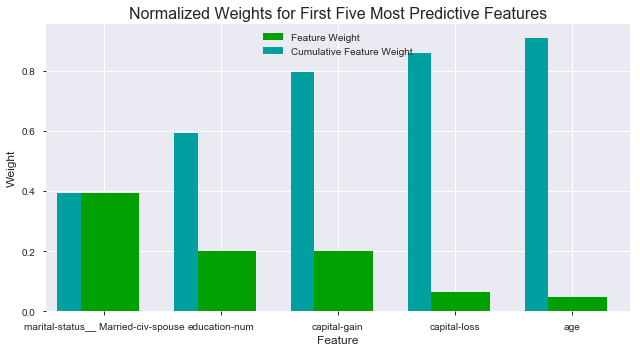

In [82]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# I already did this, as my GBC model has a feature_importances_ aattribute

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = best_clf

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

Well, I got 2/5! I honestly didn't think I'd do quite *that* poorly, but this is why we have the models, eh? I will say that, as my initial discussion indicates, I considered that `capital-gain` and `capital-loss` could be important features, but they just seemed to have non-zero values so frequently that I couldn't imagine they'd be providing much predictive power. I guess even though only 5-9% of the observations have non-zero values for these features, that provides a whole lot of insight! Their inclusion ultimately isn't the biggest surprise in the world though. Even though the data dictionary provided in `README.md` wasn't super-useful for these two features, I can infer that they likely represent gains and losses in investments for an individual. Given that many folks typically invest only for their retirement accounts and those kinds of accounts usually are more prevalent in higher-paying white-collar jobs, I can see why these features might be important.

I correctly guessed that `education-num` and `age` would factor into this. Huzzah!

`marital-status == Married-civ-spouse` was a surprise to me. Deductive reasoning suggests that individuals with this status are civilians who are married. It's not surprising that a married civilian would make a higher level of earnings than unmarried individuals or those who work primarily in the Armed Forces, but it seems like a stretch to assume that all married civilians in the data are likely to out-earn the other marital types. And for it to be the most important feature out of all of them? That just seems so surprising. 

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [83]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8642
F-score on testing data: 0.7425

Final Model trained on reduced data
------
Accuracy on testing data: 0.8582
F-score on testing data: 0.7306


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The F-score on the reduced feature set model is 0.0119 less than the model trained with the full feature set (a 1.6% reduction). The accuracy decreased by 0.006 for the reduced model compared to the full model (a 0.69% reduction). While these certainly are not improvements, to me these are definitely not sufficiently large enough reductions to worry about, especially if training time is very important.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.